## **Install Packages & Dependencies**

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [4]:
import requests

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## **Task 1 : Create NumPy Array**

In [8]:
# Create a pandas series 'Y' from the 'Class' column
Y = data['Class']

# Convert the pandas series to a numpy array
Y = Y.to_numpy()

## **Task 2 : Standardize Data**

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data in the DataFrame 'X'
X_standardized = scaler.fit_transform(X)

# Reassign the standardized data back to the variable 'X'
X = pd.DataFrame(X_standardized, columns=X.columns)

## **Task 3 : Create Train/Test split and set parameters**

In [10]:
# Step 1: Split the data into training and test sets for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Now you have the following variables:
# X_train: Training data for X
# X_test: Test data for X
# Y_train: Training data for Y
# Y_test: Test data for Y

# You can optionally print the shapes of the data to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


In [11]:
Y_test.shape

(18,)

## **Task 4 : Logistic Regression - Training**

In [12]:
# Create a logistic regression object
logreg = LogisticRegression()

# Define the parameter grid for GridSearchCV
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create a GridSearchCV object
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [14]:
#fit gridsearch object to training data

logreg_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## **Task 5 : Logistic Regression - Testing**

In [15]:
# Assess accuracy on the test data using the 'score' method
logreg_test_accuracy = logreg_cv.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: Logistic Regression", logreg_test_accuracy)

Test Accuracy: Logistic Regression 0.8333333333333334


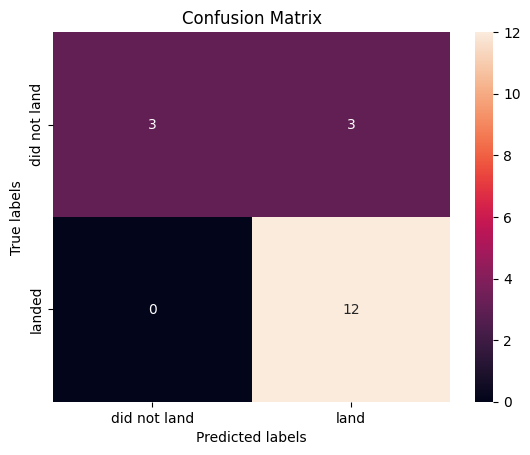

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## **Task 6 : Support Vector Machine - Training**

In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
# Create a GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

In [19]:
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## **Task 7 : Support Vector Machine - Testing**

In [20]:
# Assess accuracy on the test data using the 'score' method
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: Support Vector Machine", svm_test_accuracy)

Test Accuracy: Support Vector Machine 0.8333333333333334


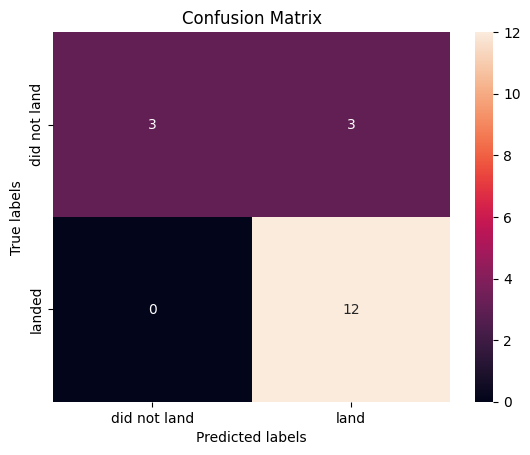

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## **Task 8 : Decision Tree - Training**

In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
# Create a GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [25]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")


tree_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8892857142857145


## **Task 9 : Decision Tree - Testing**

In [26]:
# Assess accuracy on the test data using the 'score' method
tree_test_accuracy = tree_cv.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: Decision Tree", tree_test_accuracy)

Test Accuracy: Decision Tree 0.9444444444444444


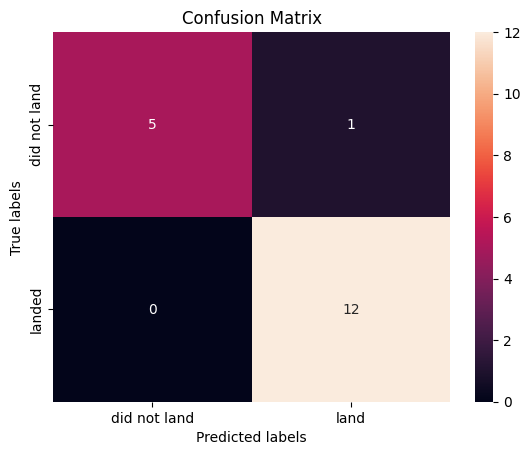

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## **Task 10: K Nearest Neighbors - Training**

In [28]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [29]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [30]:
# Create a GridSearchCV object
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [31]:
# Filter out warnings
warnings.filterwarnings("ignore")

knn_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b6e042f00d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## **Task 11: K Nearest Neighbors - Testing**

In [32]:
# Assess accuracy on the test data using the 'score' method
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: K Nearest Neighbors", knn_test_accuracy)

Test Accuracy: K Nearest Neighbors 0.8333333333333334


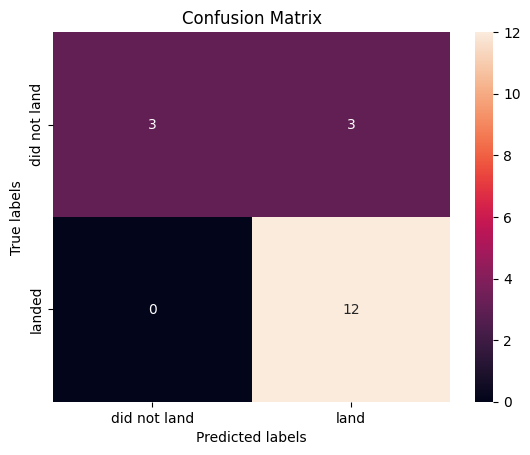

In [33]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## **Task 12 : Assessment of Best Method**

In [34]:
# Train Accuracy
print("Train Accuracy: Logistic Regression {:.2f}%".format(logreg_cv.best_score_ * 100))
print("Train Accuracy: Support Vector Machine {:.2f}%".format(svm_cv.best_score_ * 100))
print("Train Accuracy: Decision Tree {:.2f}%".format(tree_cv.best_score_ * 100))
print("Train Accuracy: K Nearest Neighbors {:.2f}%".format(knn_cv.best_score_ * 100))

# Test Accuracy
print("Test Accuracy: Logistic Regression {:.2f}%".format(logreg_test_accuracy * 100))
print("Test Accuracy: Support Vector Machine {:.2f}%".format(svm_test_accuracy * 100))
print("Test Accuracy: Decision Tree {:.2f}%".format(tree_test_accuracy * 100))
print("Test Accuracy: K Nearest Neighbors {:.2f}%".format(knn_test_accuracy * 100))


Train Accuracy: Logistic Regression 84.64%
Train Accuracy: Support Vector Machine 84.82%
Train Accuracy: Decision Tree 88.93%
Train Accuracy: K Nearest Neighbors 84.82%
Test Accuracy: Logistic Regression 83.33%
Test Accuracy: Support Vector Machine 83.33%
Test Accuracy: Decision Tree 94.44%
Test Accuracy: K Nearest Neighbors 83.33%


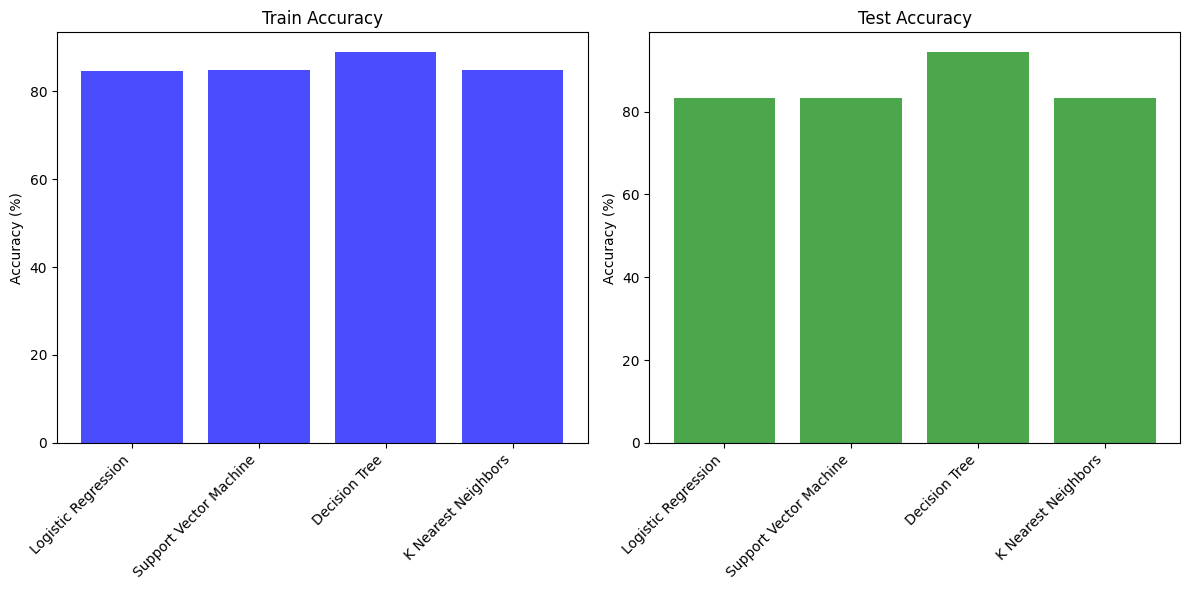

In [35]:
import matplotlib.pyplot as plt

# Train accuracy data
train_accuracy = [logreg_cv.best_score_ * 100, svm_cv.best_score_ * 100, tree_cv.best_score_ * 100, knn_cv.best_score_ * 100]

# Test accuracy data
test_accuracy = [logreg_test_accuracy * 100, svm_test_accuracy * 100, tree_test_accuracy * 100, knn_test_accuracy * 100]

# Labels for the bars
labels = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors']

# Create a figure and axis object
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot train accuracy histogram
axs[0].bar(labels, train_accuracy, color='blue', alpha=0.7)
axs[0].set_title('Train Accuracy')
axs[0].set_ylabel('Accuracy (%)')

# Plot test accuracy histogram
axs[1].bar(labels, test_accuracy, color='green', alpha=0.7)
axs[1].set_title('Test Accuracy')
axs[1].set_ylabel('Accuracy (%)')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.set_xticklabels(labels, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
